In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error

In [2]:
# Load the data
train = pd.read_csv('./dataset/train.csv')
test = pd.read_csv('./dataset/test.csv')
testID = test['Id']

In [3]:
# View the data as a preview
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [5]:
# Viewing information about the data variables
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
#Identify the features in which there are more than 30% of the data nulled out
missing_features = []
for ftr in train.columns.values:
    if train[ftr].isnull().sum() > (len(train) // 3.0):
        missing_features.append(ftr)
        print(ftr)

Alley
FireplaceQu
PoolQC
Fence
MiscFeature


In [7]:
train.drop(missing_features, axis=1, inplace=True)
test.drop(missing_features, axis=1, inplace=True)

In [8]:
train.shape, test.shape

((1460, 76), (1459, 75))

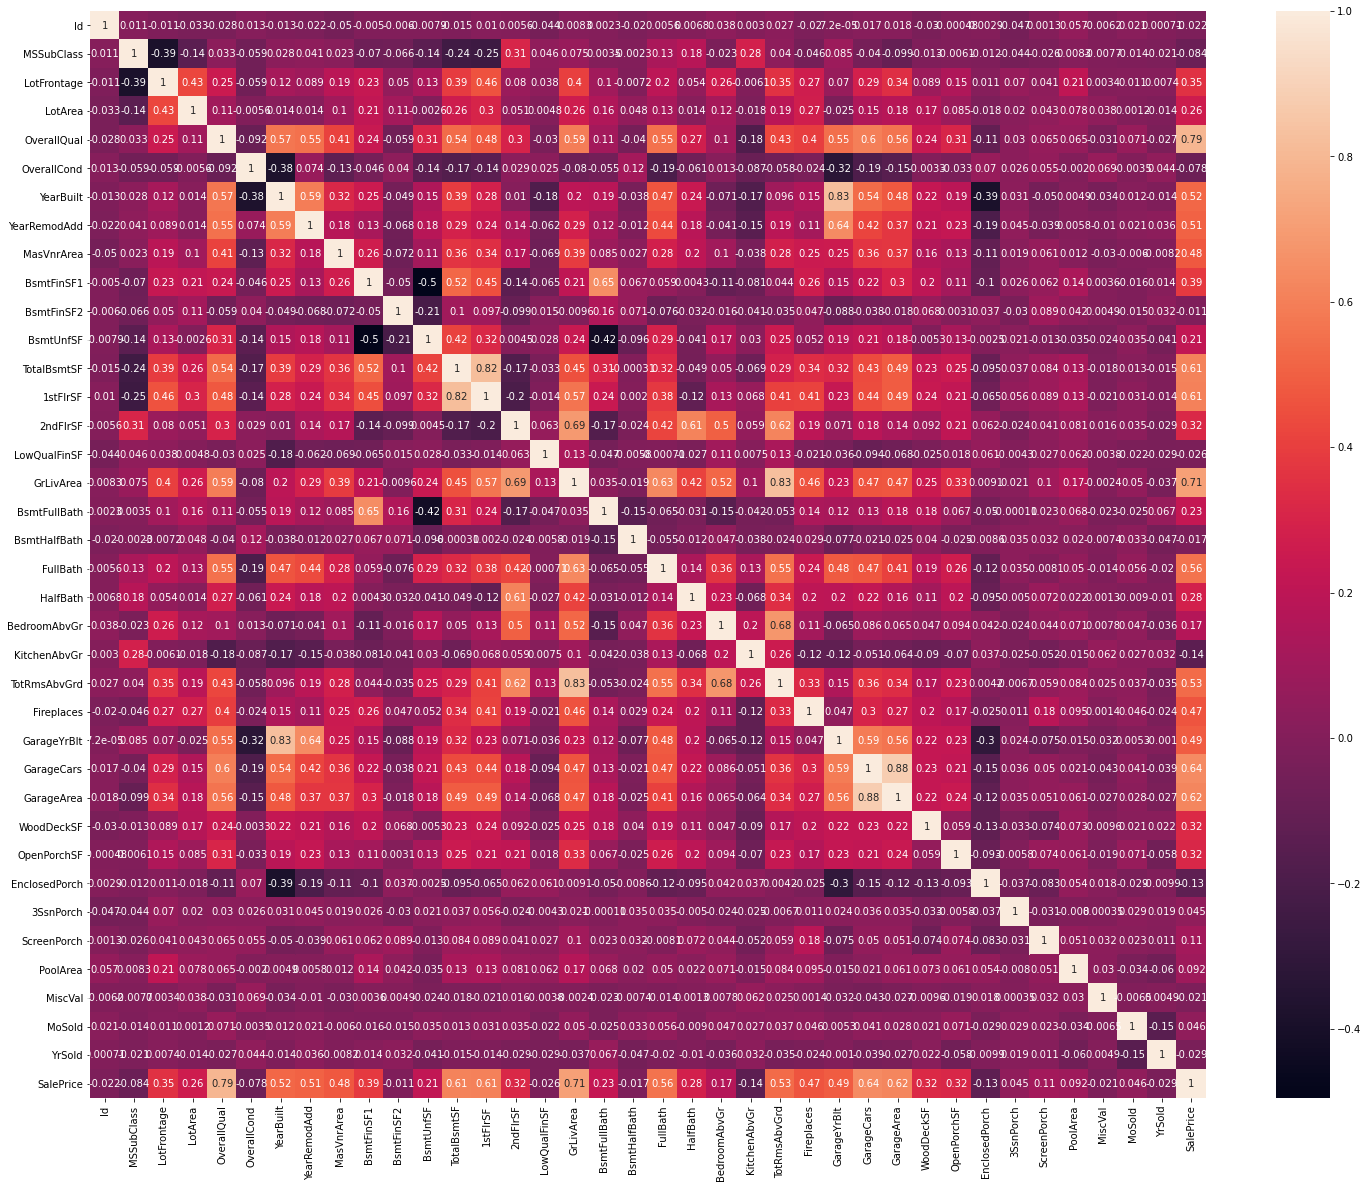

In [9]:
# Look for correlations between the features to prep for removing correlated features
plt.figure(figsize=(25, 20))
sns.heatmap(train.corr(), annot=True)
plt.show()

In [10]:
# Remove features that are highly correlated
cols_to_remove = []
corltn_data = train.corr()
corltn_vals = corltn_data['SalePrice'].sort_values(ascending=False)
corltn_vals = abs(corltn_vals).sort_values(ascending=False)
for col in range(len(corltn_vals)):
    if abs(corltn_vals[col]) < 0.2:
        cols_to_remove.append(corltn_vals.index[col])
        train = train.drop([corltn_vals.index[col]], axis=1)

train.shape

(1460, 61)

In [11]:
cols_to_remove

['BedroomAbvGr',
 'KitchenAbvGr',
 'EnclosedPorch',
 'ScreenPorch',
 'PoolArea',
 'MSSubClass',
 'OverallCond',
 'MoSold',
 '3SsnPorch',
 'YrSold',
 'LowQualFinSF',
 'Id',
 'MiscVal',
 'BsmtHalfBath',
 'BsmtFinSF2']

In [12]:
test.drop(cols_to_remove, inplace=True, axis=1)

In [13]:
test

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition
0,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,Unf,1.0,730.0,TA,TA,Y,140,0,WD,Normal
1,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,Unf,1.0,312.0,TA,TA,Y,393,36,WD,Normal
2,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,Fin,2.0,482.0,TA,TA,Y,212,34,WD,Normal
3,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,Fin,2.0,470.0,TA,TA,Y,360,36,WD,Normal
4,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,...,RFn,2.0,506.0,TA,TA,Y,0,82,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,NaN,0.0,0.0,NaN,NaN,Y,0,0,WD,Normal
1455,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,Unf,1.0,286.0,TA,TA,Y,0,24,WD,Abnorml
1456,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,...,Unf,2.0,576.0,TA,TA,Y,474,0,WD,Abnorml
1457,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,...,NaN,0.0,0.0,NaN,NaN,Y,80,32,WD,Normal


In [14]:
train2 = train.iloc[:,:-1]

In [15]:
#lebel encoding instead onehot
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train2 = train2.apply(le.fit_transform)
test = test.apply(le.fit_transform)
train2

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition
0,3,36,327,1,3,3,0,4,0,5,...,1,2,220,4,4,2,0,49,8,4
1,3,51,498,1,3,3,0,2,0,24,...,1,2,149,4,4,2,187,0,8,4
2,3,39,702,1,0,3,0,4,0,5,...,1,2,260,4,4,2,0,30,8,4
3,3,31,489,1,0,3,0,0,0,6,...,2,3,284,4,4,2,0,24,8,0
4,3,55,925,1,0,3,0,2,0,15,...,1,3,380,4,4,2,118,70,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,33,267,1,3,3,0,4,0,8,...,1,2,149,4,4,2,0,28,8,4
1456,3,56,866,1,3,3,0,4,0,14,...,2,2,182,4,4,2,214,0,8,4
1457,3,37,415,1,3,3,0,4,0,6,...,1,1,24,4,4,2,0,48,8,4
1458,3,39,505,1,3,3,0,4,0,12,...,2,1,19,4,4,2,224,0,8,4


In [16]:
test

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition
0,2,56,777,1,3,3,0,4,0,12,...,2,1,348,3,4,2,75,0,8,4
1,3,57,964,1,0,3,0,0,0,12,...,2,1,67,3,4,2,225,24,8,4
2,3,50,947,1,0,3,0,4,0,8,...,0,2,179,3,4,2,134,22,8,4
3,3,54,587,1,0,3,0,4,0,8,...,0,2,168,3,4,2,219,24,8,4
4,3,19,118,1,0,1,0,4,0,22,...,1,2,198,3,4,2,0,68,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,0,19,1,3,3,0,4,0,10,...,3,0,0,4,5,2,0,0,8,4
1455,4,0,17,1,3,3,0,4,0,10,...,2,1,49,3,4,2,0,12,8,0
1456,3,112,1069,1,3,3,0,4,0,11,...,2,2,253,3,4,2,245,0,8,0
1457,3,38,647,1,3,3,0,4,0,11,...,3,0,0,4,5,2,37,20,8,4


In [17]:
# # One Hot Encoding of the Variables
# onehot_encoded_cols = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
#                        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
#                        'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
#                        'CentralAir', 'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType',
#                        'SaleCondition']

# # Ordinal Encoding of Variables
# # Col : Coverage : Mapping
# ordinal_encoded_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
#                         'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond']

# ordinal_encoding_dict = [{'col': 'ExterQual', 'mapping': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}},
#                          {'col': 'ExterCond', 'mapping': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}},
#                          {'col': 'BsmtQual', 'mapping': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}},
#                          {'col': 'BsmtCond', 'mapping': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}},
#                          {'col': 'BsmtExposure', 'mapping': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0}},
#                          {'col': 'BsmtFinType1',
#                           'mapping': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0}},
#                          {'col': 'BsmtFinType2',
#                           'mapping': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0}},
#                          {'col': 'HeatingQC', 'mapping': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}},
#                          {'col': 'KitchenQual', 'mapping': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}},
#                          {'col': 'GarageQual', 'mapping': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}},
#                          {'col': 'GarageCond', 'mapping': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}}]



In [18]:
# import category_encoders as ce

# ordinal_encoder = ce.OrdinalEncoder(cols=ordinal_encoded_cols, mapping=ordinal_encoding_dict)
# onehot_encoder = ce.OneHotEncoder(cols=onehot_encoded_cols)

In [19]:
# train = onehot_encoder.fit_transform(train)
# test = onehot_encoder.fit_transform(test)

In [20]:
x = train2.values
y = train['SalePrice'].values

Using sklearn library

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.1, random_state=41)

In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_val = sc.fit_transform(x_val)

In [23]:
y_train = np.log(y_train)
y_val = np.log(y_val)

In [24]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(x_train, y_train)

In [25]:
def print_rmse_score_by_model(model_name, model):
    print("{}:".format(model_name))
    print("train_score:", model.score(x_train, y_train))
    print("test_score:", model.score(x_val, y_val))
    y_pred1 = model.predict(x_train)
    y_pred2 = model.predict(x_val)
    print("train RMSE:", np.sqrt(mean_squared_error(y_train, y_pred1)))
    print("test RMSE:", np.sqrt(mean_squared_error(y_val, y_pred2)))
    print("------------------------------")

In [26]:
print_rmse_score_by_model("Linear Regression", lr)

Linear Regression:
train_score: 0.8905250827739998
test_score: 0.9093031913896283
train RMSE: 0.13352286503993294
test RMSE: 0.10763283760975267
------------------------------


# Manual implementation

In [27]:
#data split
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.1, random_state=41)

#scaling the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_val = sc.fit_transform(x_val)

In [28]:
y_train = np.log(y_train)
y_val = np.log(y_val)

In [29]:
def CostFunction(x,y,w,b):
    cost = np.sum((((x.dot(w) + b) - y) ** 2) / (2*len(y)))
    return cost

In [30]:
def GradientDescent(x, y, w, b, learning_rate, epochs):
    cost_list = [0] * epochs
    for epoch in range(epochs):
        z = x.dot(w) + b
        loss = z - y
        weight_gradient = x.T.dot(loss) / len(y)
        bias_gradient = np.sum(loss) / len(y)
        w = w - learning_rate*weight_gradient
        b = b - learning_rate*bias_gradient
        cost = CostFunction(x, y, w, b)
        cost_list[epoch] = cost
        if (epoch%(epochs/10)==0):
            print("Cost is:",cost)
    return w, b, cost_list

In [31]:
wei = np.random.randn(x_train.shape[1])

In [32]:
w, b, c= GradientDescent(x_train, y_train, wei, 1, 0.01,epochs=10000)

Cost is: 90.97052392442399
Cost is: 0.07710901914263932
Cost is: 0.030905443277552774
Cost is: 0.01826978971195862
Cost is: 0.013090055867229385
Cost is: 0.010803964898327814
Cost is: 0.009774639491720562
Cost is: 0.009307311384457052
Cost is: 0.009094183994677653
Cost is: 0.008996716982005198


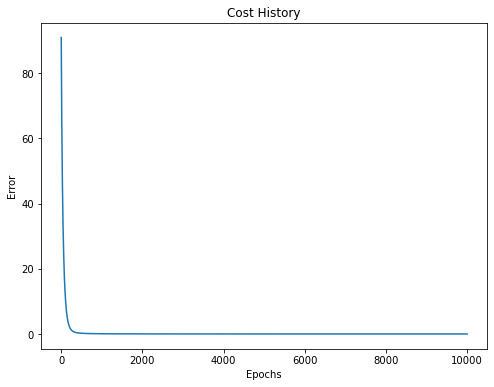

In [33]:
plt.figure(figsize=(8,6))
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Cost History')
plt.plot(c)
plt.show()

In [34]:
def predict(X, w,b):
    return X.dot(w) + b

In [35]:
y_pred1 = predict(x_train, w, b)
y_pred2 = predict(x_val, w, b)

In [36]:
print("train RMSE:", np.sqrt(mean_squared_error(y_train, y_pred1)))
print("test RMSE:", np.sqrt(mean_squared_error(y_val, y_pred2)))
print("------------------------------")

train RMSE: 0.133806515056229
test RMSE: 0.11874641285117028
------------------------------


In [37]:
test = sc.fit_transform(test)

In [38]:
y_pred = predict(test, w, b)

In [40]:
submission = pd.DataFrame({'Id': testID, 'SalePrice': np.exp(y_pred)})
submission.to_csv('submission.csv', index=False)
# Save CSV to disk